In [35]:
import pandas as pd

In [184]:
def getDfFromFile(filename):
    f = open(filename, 'r')
    data = {}
    headers = f.readline().rstrip('\n').split('\t')
    for header in headers:
        data[header] = []
    for line in f:
        for word in line.splitlines():
            lineData = word.split('\t')
            for i in range(0, len(lineData)):
                item = lineData[i]
                if item.isalpha():
                    data[headers[i]].append(item)
                else:
                    data[headers[i]].append(float(item))
    f.close()
    return pd.DataFrame(data)

In [185]:
hotels = getDfFromFile('hotels.txt')
hotels.head()

,hotel,star_rating
0,1.0,3.0
1,2.0,2.0
2,3.0,3.5
3,4.0,4.0
4,5.0,4.0


In [186]:
users = getDfFromFile('users.txt')
users.head()

,user,home continent,gender
0,1.0,2.0,female
1,2.0,3.0,female
2,3.0,1.0,male
3,4.0,2.0,female
4,5.0,2.0,male


In [194]:
f = open('activity15K.csv')
headers = f.readline().splitlines()[0].replace('"', '').split()
data = {}
data[headers[0]] = []
data[headers[1]] = []
count = 0
for line in f:
    count+=1
    (record, userId, hotelId) = line.splitlines()[0].replace('"', '').split()
    data[headers[0]].append(float(userId))
    data[headers[1]].append(float(hotelId))
usersHotel = pd.DataFrame(data)
usersHotel.head()

,user,hotel
0,2764.0,62.0
1,1525.0,26.0
2,1815.0,59.0
3,2328.0,17.0
4,457.0,49.0


In [197]:
usersAverage = usersHotel.merge(hotels, on='hotel')[['user', 'star_rating']].groupby('user').mean()
usersAverage.head()

,star_rating
user,
1.0,3.500000
2.0,4.500000
3.0,4.285714
4.0,4.500000
5.0,3.833333


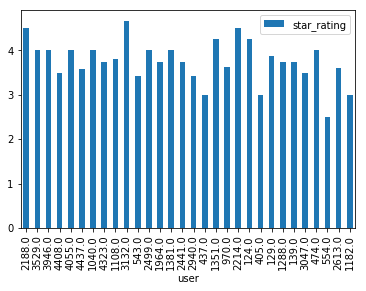

In [203]:
usersAverage.sample(30).plot.bar()